In [1]:
# importing  libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Using import os to check path
display (os.getcwd())
files = os.listdir('.')
print(files)

'/content'

['.config', 'sample_data']


In [3]:
# Since we are using google cloab. we will set our path to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Setting our path to google drive
os.chdir ('/content/drive/My Drive/Colab Notebooks/Bharat/project_2_content')

In [5]:
# Cheacking the path
display (os.getcwd())

'/content/drive/My Drive/Colab Notebooks/Bharat/project_2_content'

In [6]:
# setting csv file for opening and reading
titanic_df =pd.read_csv("titanic_data.csv", header=0)

In [7]:
# displaying csv file
display (titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# displaying the shape of csv file
print(titanic_df.shape)

(891, 12)


In [9]:
# get overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked.    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


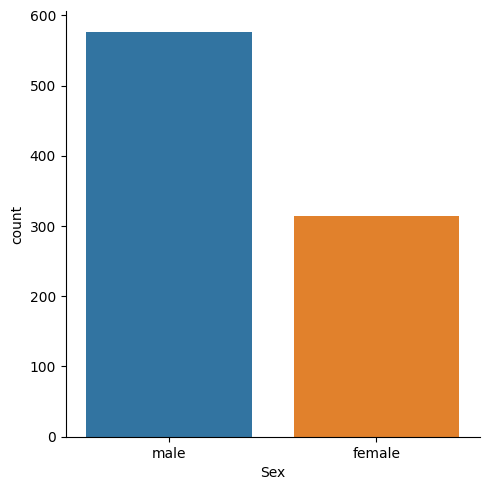

In [10]:
# ploting a graph of gender
sns.catplot( x = 'Sex', data=titanic_df, kind="count")

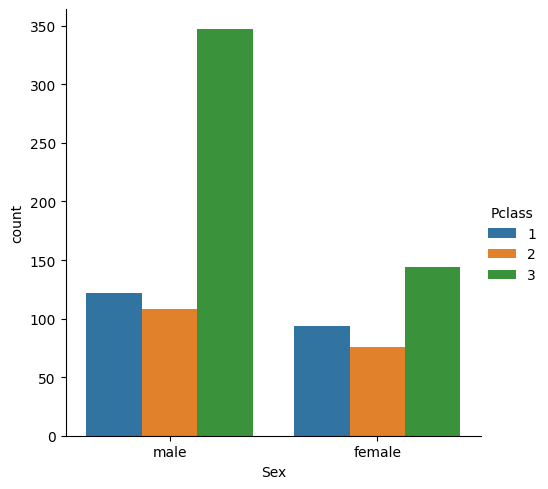

In [11]:
# We will plot a graph of gender but also inculding Passenger class or Pclass
sns.catplot( x = 'Sex', data=titanic_df, kind="count", hue='Pclass')

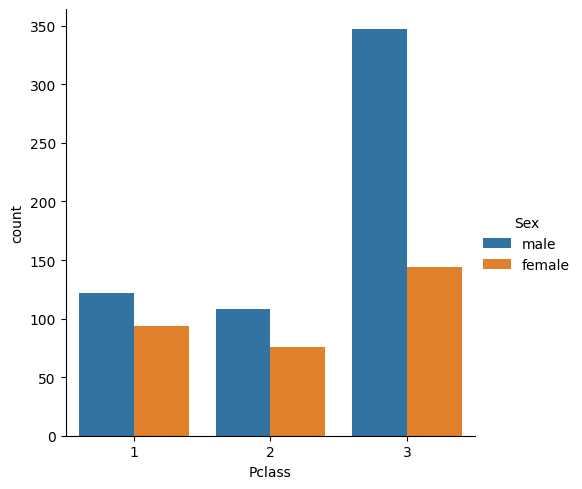

In [12]:
sns.catplot( x = 'Pclass', data=titanic_df, kind="count", hue='Sex')

In [13]:
# We will further divided gender  into boy, girl, man, woman and old
def male_female_child(passenger):
    age,sex = passenger
    if age < 18 and sex == 'male' :
      return 'Boy'
    elif age < 18 and sex == 'female' :
      return 'Girl'
    elif age >= 18 and age < 60 and sex == 'male' :
      return 'Man'
    elif age >= 18 and age < 60 and sex == 'female' :
      return 'Woman'
    elif age >= 60 and sex == 'male':
      return 'Old Man'
    elif age >= 60 and sex == 'female':
      return 'Old Woman'
    else:
      return sex

In [14]:
# Defineing a new column called 'person'
titanic_df['Person']= titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [15]:
# checking if its works
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Man
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Boy
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Woman
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Girl


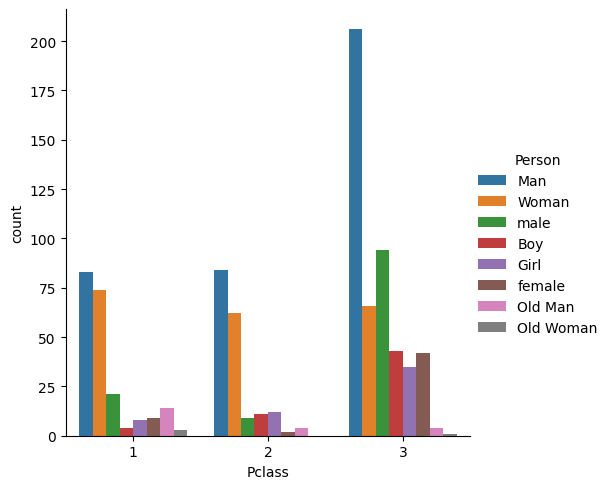

In [16]:
# we will see the plot again , here we are getting male and female again because some pessanger did not mentaion their age
sns.catplot(x = 'Pclass', data=titanic_df, kind="count", hue='Person')

<Axes: >

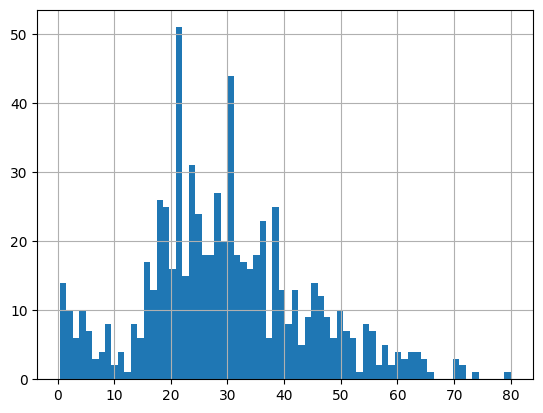

In [17]:
#We will see age of all passenger in histograph
titanic_df['Age'].hist(bins=70)

In [18]:
# Getting mean of the age
titanic_df['Age'].mean()

29.69911764705882

In [19]:
# we will see the count of all person
titanic_df['Person'].value_counts()

Man          373
Woman        202
male         124
Boy           58
Girl          55
female        53
Old Man       22
Old Woman      4
Name: Person, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


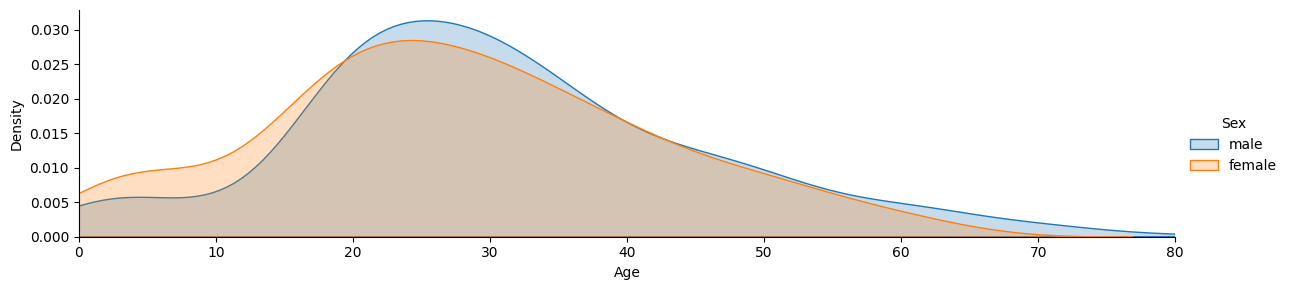

In [20]:
# we can  visualize  data by useing FacetGrid to plot multiple kedplots on one plot. This graph is plotted on basis of sex
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

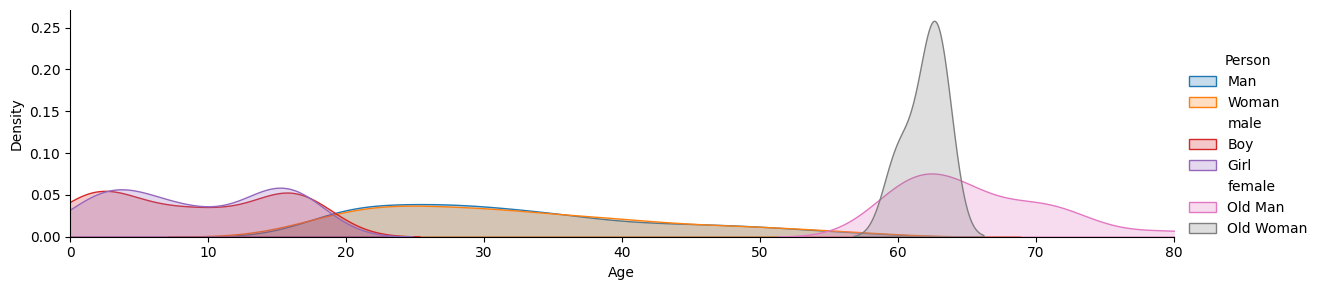

In [21]:
# We can again  visualize  data by useing FacetGrid to plot multiple kedplots on one plot. This graph is plotted on basis of person
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim= (0,oldest))
fig.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


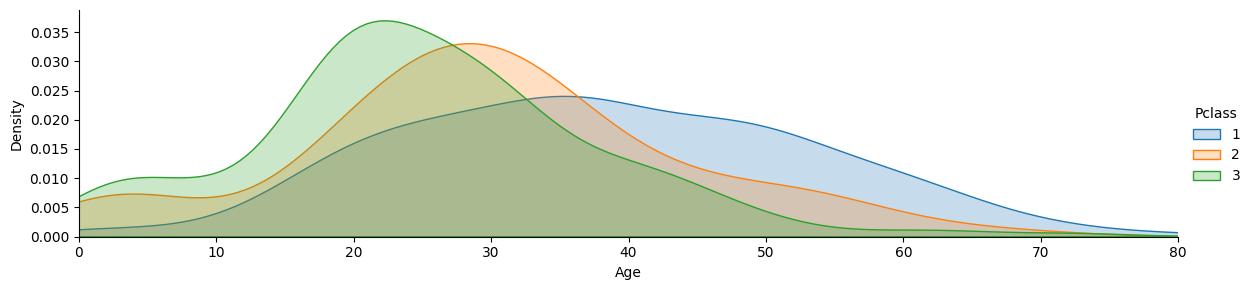

In [22]:
# We can again  visualize  data by useing FacetGrid to plot multiple kedplots on one plot. This graph is plotted on basis of pclass
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim= (0,oldest))
fig.add_legend()

In [23]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Man
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Boy
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Woman
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Girl


In [24]:
# we will drop the nan value and make a new object deck
deck = titanic_df['Cabin'].dropna()

In [25]:
# we will check deck
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

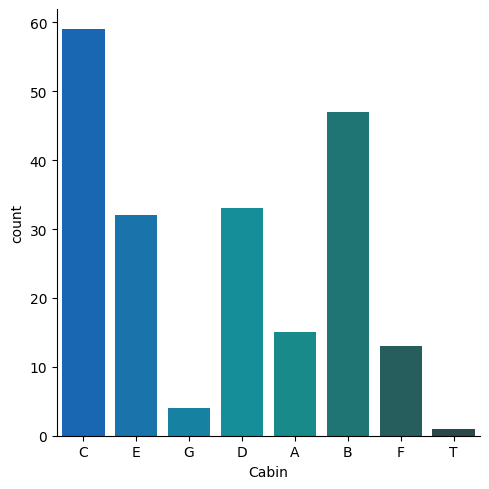

In [26]:
# here we will try to make where they were sited . because the first letter of ticket shows were they were ment to seated
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot( x ='Cabin', data=cabin_df, palette='winter_d',kind='count')

In [27]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Man
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Boy
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Woman
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Girl


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked.', 'Person'],
      dtype='object')


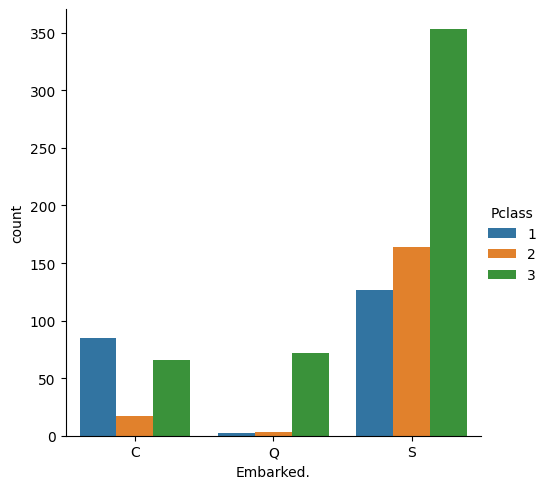

In [28]:
# we will see where the embarked on ship as C ,Q , S refers to different port
print(titanic_df.columns)
sns.catplot(x='Embarked.', data=titanic_df, hue='Pclass', order=['C', 'Q', 'S'], kind='count')

In [29]:
# Now, we will see if they were alone or not by making a coloumn . parch repersents if they were traveling with someone and sibsp repersents sibling
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [30]:
# Here we are are checking . if they are alone or with family
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

<ipython-input-30-c635797bf50a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'


In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Man,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Woman,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Woman,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Woman,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Man,Alone


In [32]:
titanic_df['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: Alone, Length: 891, dtype: object

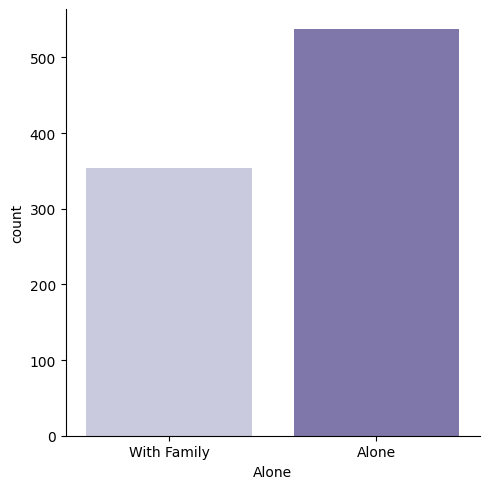

In [33]:
# we are visualize data of how many are with family or alone
sns.catplot(x ='Alone', data=titanic_df, palette='Purples', kind='count')

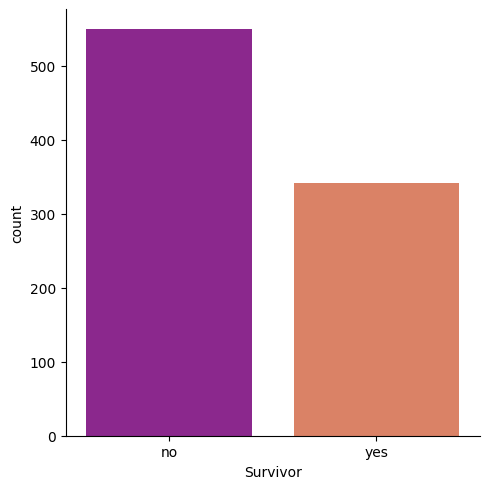

In [34]:
#  we are visualize data of how many are with family or alone
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})
sns.catplot(x = 'Survivor', data=titanic_df, palette='plasma', kind='count')

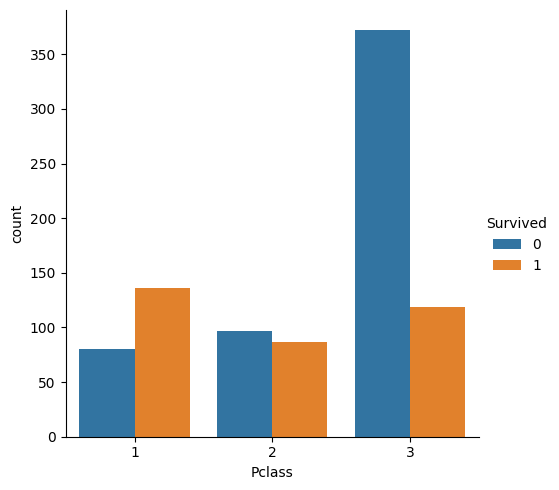

In [35]:
# we will plot a graph of total number of Passenger survied or not in which passenger class
sns.catplot(x='Pclass', hue='Survived', data=titanic_df, kind='count')

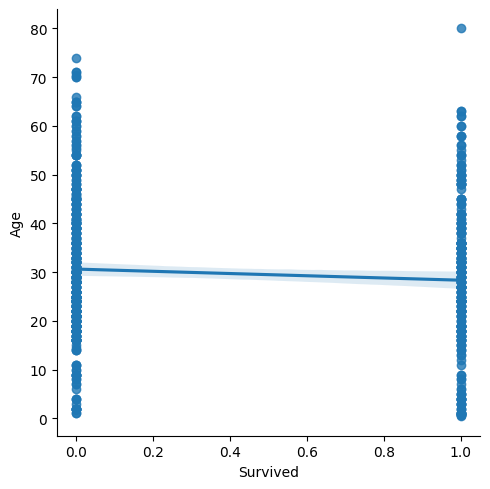

In [36]:
# we are ploting a linear graph for age versus survival
sns.lmplot(x='Survived', y='Age', data=titanic_df)

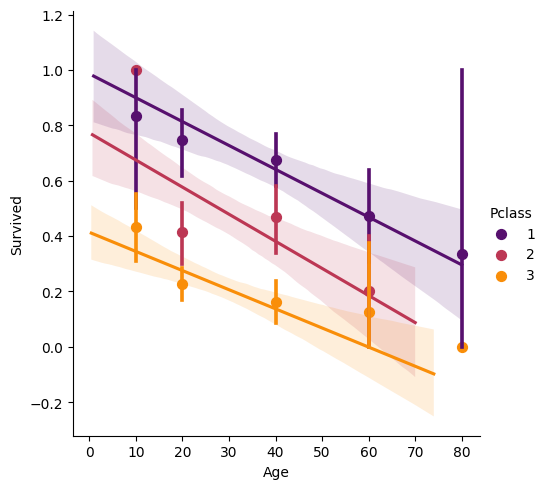

In [37]:
 #we are ploting a linear graph for age versus survival with different age group and passenger class
generations = [10, 20, 40, 60, 80]
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='inferno', x_bins=generations)

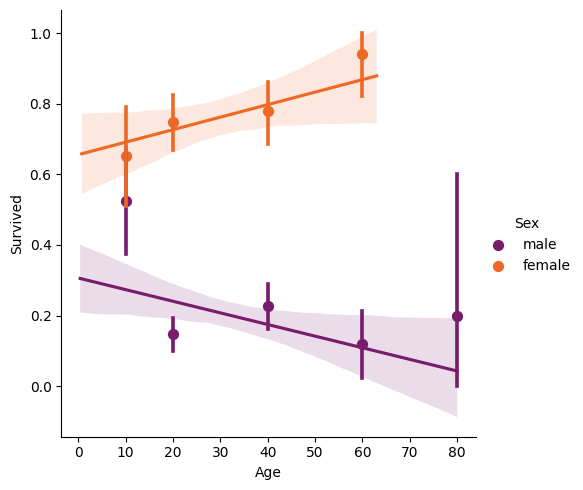

In [38]:
#we are ploting a linear graph for age versus survival of gender
sns.lmplot( x = 'Age', y = 'Survived',hue='Sex', data=titanic_df, palette='inferno',x_bins=generations)

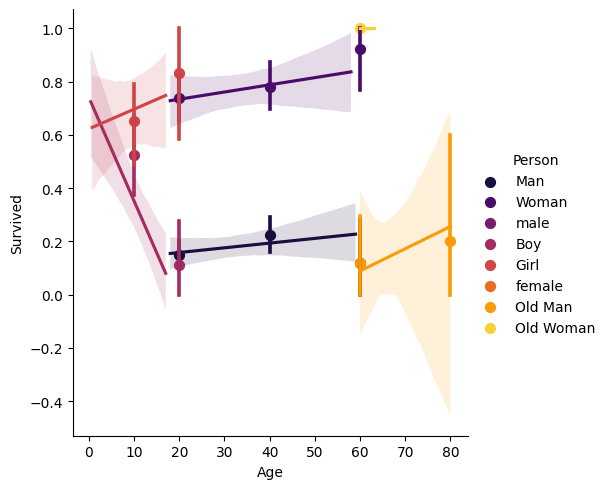

In [39]:
#we are ploting a linear graph for age versus survival of different age group and gender
sns.lmplot(x = 'Age',y = 'Survived',hue='Person', data=titanic_df, palette='inferno',x_bins=generations)

In [40]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Man,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Woman,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Woman,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Woman,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Man,Alone,no


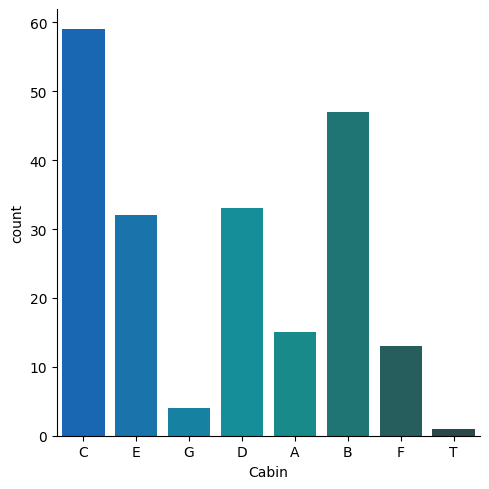

In [41]:
# we are poting graph of which passenger has siting place
sns.catplot(x = 'Cabin', data=cabin_df, palette='winter_d',kind='count')

In [42]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [43]:
cabin_df = pd.concat([cabin_df, titanic_df['Sex']], axis=1)

In [44]:
cabin_df = pd.concat([cabin_df, titanic_df['Survived']], axis=1)

In [45]:
# Here we are making this array . so we can analyise which passenger survied where in their siting position
cabin_df.head()

,Cabin,Sex,Survived
0,C,male,0
1,C,female,1
2,E,female,1
3,G,female,1
4,C,male,0


In [46]:
# 1 repersent as survival and 0 as non survival

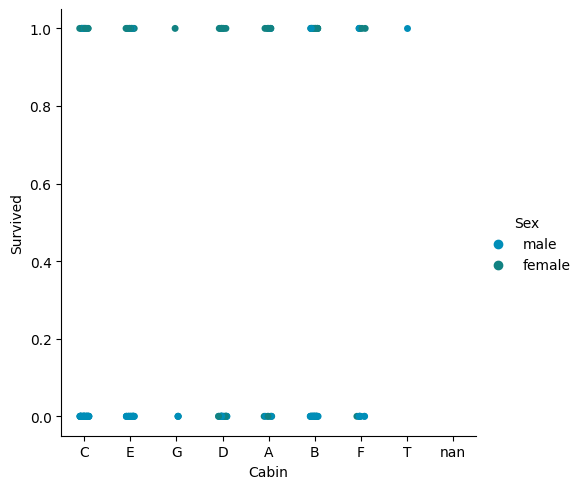

In [47]:
# we have plotted a graph of survived and not survived for male and female
sns.catplot(x = 'Cabin', y = 'Survived',data=cabin_df, hue='Sex', palette='winter_d')

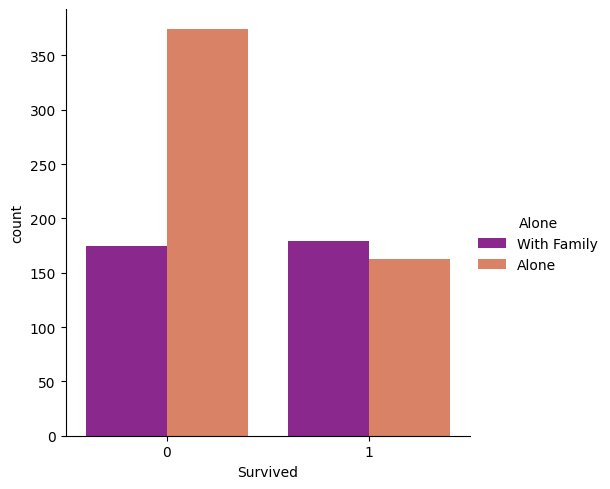

In [48]:
# we have plotted a graph of survived and not survived for with family or alone
sns.catplot( x = 'Survived',data=titanic_df, hue='Alone',palette='plasma',kind='count')

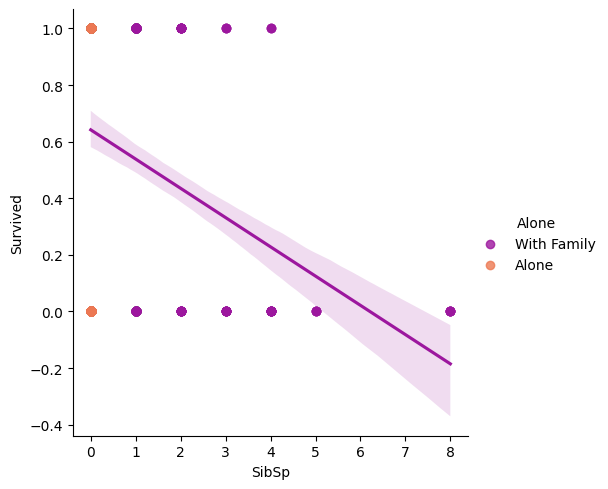

In [49]:
# we have plotted a graph of survived and not survived for siblings
sns.lmplot(x= 'SibSp',y = 'Survived',data=titanic_df, hue='Alone',palette='plasma')

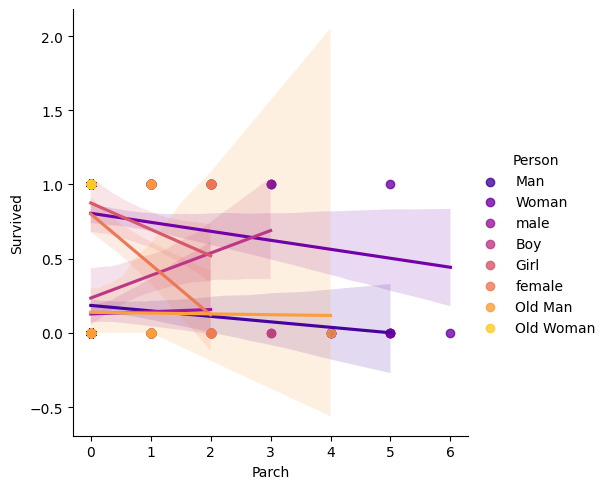

In [50]:
# we have plotted a graph of survived and not survived for all person on parch
sns.lmplot( x ='Parch', y = 'Survived',data=titanic_df, hue='Person',palette='plasma')

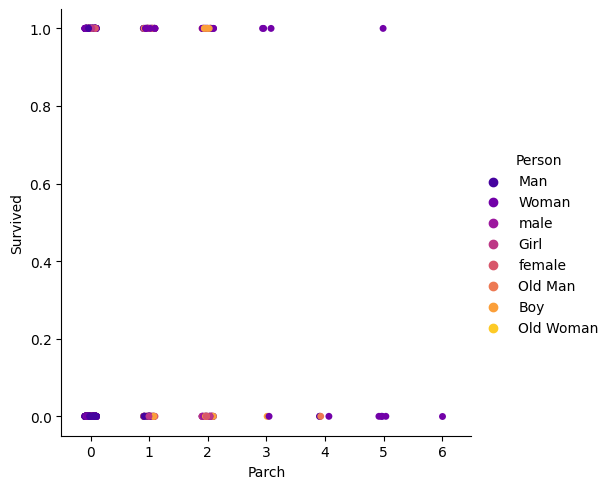

In [51]:
# # we have plotted a graph of survived and not survived for male and female
sns.catplot(x = 'Parch',y = 'Survived',data=titanic_df, hue='Person',palette='plasma')

In [52]:
'''Conclsion:
My analysis mainly covered three factors in this anlysis (Age, Sex, Pclass).
Age: Doesn't play much role in determining the survival chances.
Sex: Women had better chances of survival than any other catogeries . And Old men had worst chance of survival
In general, female across all classes had higer survival rates than their male counter part.
Pclass: Pclass-1 had best while Pclass-3 has the worst survival rate.
So we can say, that being a female in Pclass-1 seems to have the best chances of survival. However being a female could not be considered as 100% survival chance.'''

"Conclsion:\nMy analysis mainly covered three factors in this anlysis (Age, Sex, Pclass).\nAge: Doesn't play much role in determining the survival chances.\nSex: Women had better chances of survival than any other catogeries . And Old men had worst chance of survival\nIn general, female across all classes had higer survival rates than their male counter part.\nPclass: Pclass-1 had best while Pclass-3 has the worst survival rate.\nSo we can say, that being a female in Pclass-1 seems to have the best chances of survival. However being a female could not be considered as 100% survival chance."